# Route_Dynamics Example

In [1]:
import os 
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
from route_dynamics.route_energy import longi_dynam_model as ldm
from route_dynamics.route_riders import route_riders as ride
from route_dynamics.route_visualizer import visualizer as vis

/Users/ryanjcarlin/miniconda3/envs/simple_route_dynamics/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
import matplotlib.pyplot as plt

In [4]:
shapefile_name = '../data/six_routes.shp'
rasterfile_name = '../data/seattle_dtm.tif'
route_num = 45
# avalible routes: [48, 50, 75, 7, 45, 40]

In [5]:
df_45, riders_45, mass_45 = ride.route_ridership('PM', 'O', 45)
stop_coord, rider_coord = ride.stop_coord(45, riders_45)
coords = rider_coord['coordinates'].values
mass = rider_coord['Mean'].values

In [9]:
ex = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords,
    mass_array=mass + mass_45,
    a_m = 0.5
)

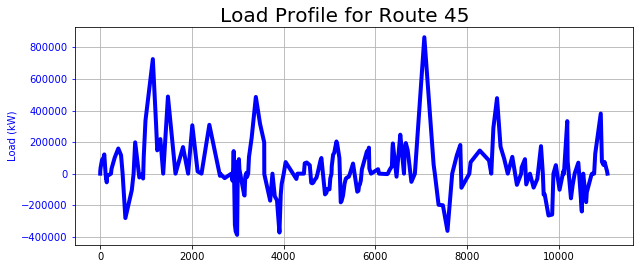

In [10]:
ami45_plot = vis.profile_x(ex.raw_batt_power_exert, ex.route_df.cum_distance, route_num)
ami45_plot

In [16]:
df_45, case1_45, mass_45 = ride.route_ridership('AM', 'I', 45)
df_45, case2_45, mass_45 = ride.route_ridership('AM', 'I', 45)
df_45, case3_45, mass_45 = ride.route_ridership('AM', 'I', 45)
case1_45['Mean'] = 0
case3_45['Mean'] = 81 * 80


In [17]:
c1df, c1_comb = ride.stop_coord(45, case1_45)

In [18]:
c2df, c2_comb = ride.stop_coord(45, case2_45)

In [19]:
c3df, c3_comb = ride.stop_coord(45, case3_45) 

In [20]:
coords1 = c1_comb['coordinates'].values
coords2 = c2_comb['coordinates'].values
coords3 = c3_comb['coordinates'].values

mass1 = c1_comb['Mean'].values
mass2 = c2_comb['Mean'].values
mass3 = c3_comb['Mean'].values

In [21]:
rd1 = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords1,
    mass_array=mass1 + mass_45,
    a_m = 0.5
    
)

In [22]:
rd2 = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords2,
    mass_array=mass2 + mass_45,
    a_m = 0.5
    
)

In [23]:
rd3 = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords3,
    mass_array=mass3 + mass_45,
    a_m = 0.5
)

In [24]:
rd1.energy_from_route()

107481550.78986791

In [25]:
rd2.energy_from_route()

114328951.95909652

In [26]:
rd3.energy_from_route()

143236904.12227592

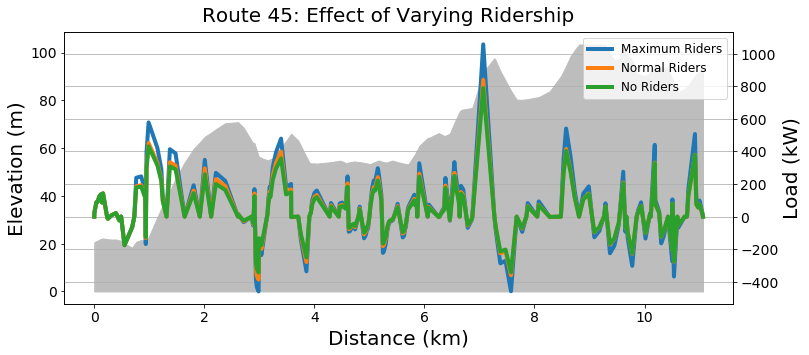

In [37]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.fill_between(rd1.route_df.cum_distance/1000, no_stops.route_df.elevation, color='#BDBDBD')
ax1 = ax.twinx() 

ax1.plot(rd3.route_df.cum_distance/1000, rd3.raw_batt_power_exert/1000, linewidth=4, label='Maximum Riders', zorder=100)
ax1.plot(rd2.route_df.cum_distance/1000, rd2.raw_batt_power_exert/1000, linewidth=4, label='Normal Riders', zorder=200)
ax1.plot(rd1.route_df.cum_distance/1000, rd1.raw_batt_power_exert/1000, linewidth=4, label='No Riders', zorder=300)

plt.legend(fontsize=12)
fig.suptitle(
    'Route {}'.format(route_num) + ': Effect of Varying Ridership',
    fontsize=20,
    y=0.95,
    )

ax.set_xlabel('Distance (km)', fontsize=20)
ax1.set_ylabel('Load (kW)', fontsize=20)
ax.set_ylabel('Elevation (m)', fontsize=20)
ax.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)
ax1.grid(axis='y')

#plt.savefig('Ridership_load.png', dpi=300)

Text(0.5, 0.95, 'Route 45: Effect of Varying Ridership (Segment)')

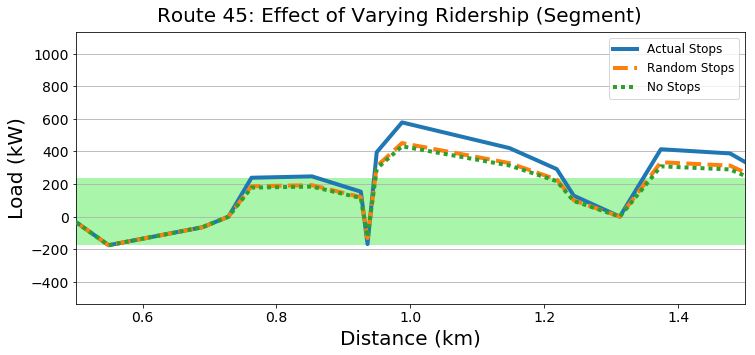

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.fill_between(rd1.route_df.cum_distance/1000, y1=240, y2=-170, color='#A9F5A9')

ax.plot(rd3.route_df.cum_distance/1000, rd3.raw_batt_power_exert/1000, linewidth=4, label='Actual Stops', zorder=100)
ax.plot(rd2.route_df.cum_distance/1000, rd2.raw_batt_power_exert/1000, linewidth=4, label='Random Stops', zorder=200, linestyle='--')
ax.plot(rd1.route_df.cum_distance/1000, rd1.raw_batt_power_exert/1000, linewidth=4, label='No Stops', zorder=300, linestyle=(0, (1,1)))

ax.set_xlabel('Distance (km)', fontsize=20)
ax.set_ylabel('Load (kW)', fontsize=20)
ax.tick_params(labelsize=14)
ax.grid(axis='y')
plt.xlim([0.5,1.5])
plt.legend(fontsize=12)
fig.suptitle(
    'Route {}'.format(route_num) + ': Effect of Varying Ridership (Segment)',
    fontsize=20,
    y=0.95,
    )


#plt.savefig('Ridership_load_segment.png', dpi=300)

In [29]:
no_stops = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=None,
    mass_array=mass_45
)

In [30]:
real_stops = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords2,
    mass_array=mass_45
)

In [31]:
random_stops = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords='random',
    mass_array=mass_45
)

In [32]:
no_stops.energy_from_route()

75304374.89495116

In [33]:
real_stops.energy_from_route()

81060586.64077976

In [34]:
random_stops.energy_from_route()

81211993.74629985

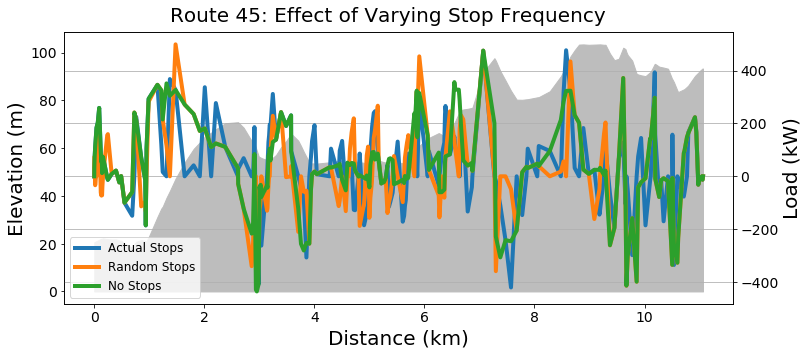

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.fill_between(no_stops.route_df.cum_distance/1000, no_stops.route_df.elevation, color='#BDBDBD')
ax1 = ax.twinx() 

ax1.plot(real_stops.route_df.cum_distance/1000, real_stops.raw_batt_power_exert/1000, linewidth=4, label='Actual Stops', zorder=100)
ax1.plot(random_stops.route_df.cum_distance/1000, random_stops.raw_batt_power_exert/1000, linewidth=4, label='Random Stops', zorder=200)
ax1.plot(no_stops.route_df.cum_distance/1000, no_stops.raw_batt_power_exert/1000, linewidth=4, label='No Stops', zorder=300)
#ax.set_xlabel('Distance (m)')
#ax.set_ylabel('Load (kW)')
#ax.tick_params('y')
#ax.grid()
#plt.xlim([0,2000])
#linestyle=(0, (1,1))
plt.legend(fontsize=12)
fig.suptitle(
    'Route {}'.format(route_num) + ': Effect of Varying Stop Frequency',
    fontsize=20,
    y=0.95,
    )

ax.set_xlabel('Distance (km)', fontsize=20)
ax1.set_ylabel('Load (kW)', fontsize=20)
ax.set_ylabel('Elevation (m)', fontsize=20)
ax.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)
ax1.grid(axis='y')

#plt.savefig('Load_profile_stops.png', dpi=300)

Text(0.5, 0.95, 'Route 45: Effect of Varying Stop Frequency (Segment)')

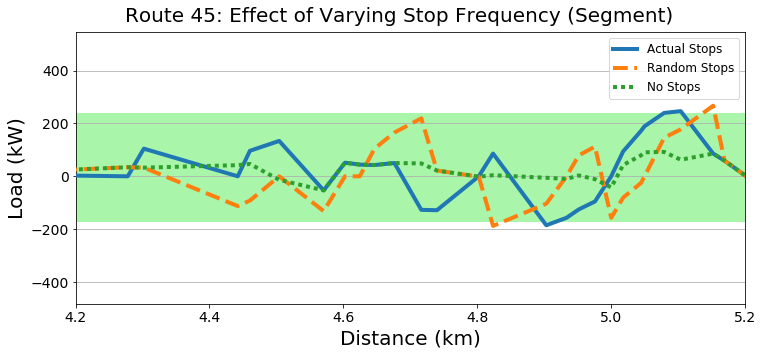

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.fill_between(no_stops.route_df.cum_distance/1000, y1=240, y2=-170, color='#A9F5A9')

ax.plot(real_stops.route_df.cum_distance/1000, real_stops.raw_batt_power_exert/1000, linewidth=4, label='Actual Stops', zorder=100)
ax.plot(random_stops.route_df.cum_distance/1000, random_stops.raw_batt_power_exert/1000, linewidth=4, label='Random Stops', zorder=200, linestyle='--')
ax.plot(no_stops.route_df.cum_distance/1000, no_stops.raw_batt_power_exert/1000, linewidth=4, label='No Stops', zorder=300, linestyle=(0, (1,1)))

ax.set_xlabel('Distance (km)', fontsize=20)
ax.set_ylabel('Load (kW)', fontsize=20)
ax.tick_params(labelsize=14)
ax.grid(axis='y')
plt.xlim([4.2,5.2])
plt.legend(fontsize=12)
fig.suptitle(
    'Route {}'.format(route_num) + ': Effect of Varying Stop Frequency (Segment)',
    fontsize=20,
    y=0.95,
    )


#plt.savefig('Load_profile_stops_segment.png', dpi=300)